In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("Ineuron-ANN-main/Churn_Modelling.csv")

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
X=dataset.iloc[:,3:13] ### Independent features
Y=dataset.iloc[:,13]  ### Dependent Features

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Look for NA values

In [11]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

### Look for Categorical Features

In [10]:
print(len(X["Geography"].unique()))
print(len(X["Gender"].unique()))

3
2


In [11]:
print(len(X["Age"].unique()))

70


In [12]:
geography=pd.get_dummies(X["Geography"],drop_first=True) ### Also handling Dummy Variable Trap
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [13]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [22]:
gender.tail()

,Male
9995,1
9996,1
9997,0
9998,1
9999,0


In [14]:
X=pd.concat([X,geography,gender],axis=1)

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
X.drop(["Geography","Gender"],inplace=True,axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
X.shape

(10000, 11)

In [18]:
Y.shape

(10000,)

### Split data into train and test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)   

### Simple ANN

In [24]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [25]:
classifier = Sequential()
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11)) ### hidden layer and input layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu')) # 2nd layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #output layer
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [27]:
X_train.shape

(8000, 11)

### training the model

In [32]:
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
54/54 [==============================] - 0s 9ms/step - loss: 0.7044 - accuracy: 0.5600 - val_loss: 0.6210 - val_accuracy: 0.6611
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7149 - val_loss: 0.5482 - val_accuracy: 0.7402
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7681 - val_loss: 0.5141 - val_accuracy: 0.7774
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7873 - val_loss: 0.4945 - val_accuracy: 0.7895
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7968 - val_loss: 0.4817 - val_accuracy: 0.7921
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.8018 - val_loss: 0.4723 - val_accuracy: 0.7948
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8043 - val_loss: 0.4654 - val_accuracy: 0.7963
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3454 - accuracy: 0.8545 - val_loss: 0.3473 - val_accuracy: 0.8508
Epoch 60/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8556 - val_loss: 0.3466 - val_accuracy: 0.8501
Epoch 61/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8558 - val_loss: 0.3460 - val_accuracy: 0.8512
Epoch 62/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8543 - val_loss: 0.3458 - val_accuracy: 0.8504
Epoch 63/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8550 - val_loss: 0.3458 - val_accuracy: 0.8508
Epoch 64/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8556 - val_loss: 0.3450 - val_accuracy: 0.8531
Epoch 65/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8552 - val_loss: 0.3448 - val_accuracy: 0.8516
Epoch 

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

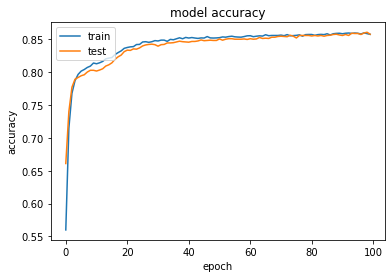

In [35]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Loss plot

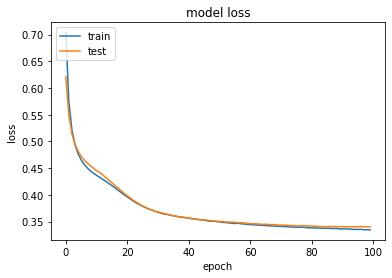

In [36]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [40]:
cm

array([[1520,   65],
       [ 224,  191]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

In [34]:
!pip install keras-tuner